##Árboles Binarios

A lo largo de esta práctica trabajaremos con la siguiente estructura, observe lo similar que es a `Node` de Listas Enlazadas, pero en lugar de `next`, posee `left` y `right`.

In [ ]:
import graphviz

class Tree:
    def __init__(self, cargo, left: 'Tree' = None, right: 'Tree' = None) -> None:
        self.cargo = cargo
        self.left = left
        self.right = right

    #def __str__(self):
     #   return str(self.cargo)


    def graph_tree(self, dot = None):
        if dot is None:
            dot = graphviz.Digraph(comment='Binary Tree')

        # Agregar el nodo actual al gráfico
        dot.node(str(self.cargo))

        # Agregar nodos para los hijos izquierdo y derecho (si existen)
        if self.left:
            dot.edge(str(self.cargo), str(self.left.cargo))
            self.left.graph_tree(dot)
        else:
            dot.node(f'None_{self.cargo}', label='None')
            dot.edge(str(self.cargo), f'None_{self.cargo}')

        if self.right:
            dot.edge(str(self.cargo), str(self.right.cargo))
            self.right.graph_tree(dot)
        else:
            dot.node(f'None_{self.cargo}', label='None')
            dot.edge(str(self.cargo), f'None_{self.cargo}')

        return dot


**Ejercicio 1**: Dibuje ejemplos de árboles en su hoja con las siguientes características, construya sus ejemplos en Python

1. Un árbol con únicamente su raíz
2. Un árbol parecido a una lista de largo 3
3. Un árbol completo de altura 1
4. Un árbol vacío ¿Puede hacerlo?

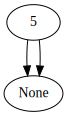

In [ ]:
arbol1 = Tree(5)
arbol1.graph_tree()

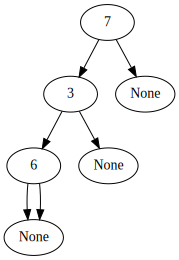

In [ ]:
arbol2 = Tree(7, Tree(3, Tree(6), None), None)
arbol2.graph_tree()

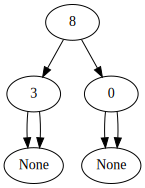

In [ ]:
arbol3 = Tree(8, Tree(3), Tree(0))
arbol3.graph_tree()

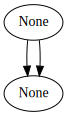

In [ ]:
arbol4 = Tree(None)
arbol4.graph_tree()

**Ejercicio 2**:

Implemente en la clase Tree los siguiente métodos:

 *Ayuda: pensar que cada árbol tiene a su izquierda y derecha objetos árboles como sus hijos*.
* **nodos**: devuelve la cantidad de nodos del árbol
* **menor_mayor**: devuelve el menor y el mayor elemento del árbol en una tupla
* **buscar**: busca si un elemento está o no en el árbol
* **altura**: calcula la altura del árbol, la distancia desde la raíz hasta la hoja más lejana

In [ ]:
import graphviz
from typing import Any

class Tree:
    def __init__(self, cargo, left: 'Tree' = None, right: 'Tree' = None):
        self.cargo = cargo
        self.left = left
        self.right = right


    def nodos(self) -> int:
        """Recorre el árbol y cuenta los nodos"""
        if self.cargo == None:
            return "Arbol vacío"

        elif self.left is None and self.right is None:
            return 1

        elif self.left is None:
            return 1 + self.right.nodos()

        elif self.right is None:
            return 1 + self.left.nodos()

        else:
            return 1 + self.left.nodos() + self.right.nodos()


    def menor_mayor(self) -> tuple:
        """Devuelve el menor y el mayor elemento de un árbol en una tupla"""
        if self.left is None and self.right is None:
            return (self.cargo, self.cargo)

        elif self.left is None:
            rmin, rmax = self.right.menor_mayor()
            return (min(self.cargo, rmin), max(self.cargo, rmax))

        elif self.right is None:
            lmin, lmax = self.left.menor_mayor()
            return (min(self.cargo, lmin), max(self.cargo, lmax))

        else:
            rmin, rmax = self.right.menor_mayor()
            lmin, lmax = self.left.menor_mayor()
            return (min(self.cargo, lmin, rmin), max(self.cargo, lmax, rmax))


    def buscar(self, elemento: Any) -> bool:
        """Busca si un elemento está en el árbol"""
        if self.cargo == elemento:
            return True

        if self.left is not None:
            if self.left.buscar(elemento):
                return True

        if self.right is not None:
            if self.right.buscar(elemento):
                return True

        return False


    def altura(self) -> int:
        """Calcula la altura del árbol"""
        if self.left is None and self.right is None:
             return 0

        elif self.left is None:
            return 1 + self.right.altura()

        elif self.right is None:
            return 1 + self.left.altura()

        return 1 + max(self.left.altura(), self.right.altura())


    def graph_tree(self, dot = None):
        if dot is None:
            dot = graphviz.Digraph(comment='Binary Tree')
        # Agregar el nodo actual al gráfico
        dot.node(str(self.cargo))
        # Agregar nodos para los hijos izquierdo y derecho (si existen)
        if self.left:
            dot.edge(str(self.cargo), str(self.left.cargo))
            self.left.graph_tree(dot)
        else:
            dot.node(f'None_{self.cargo}', label='None')
            dot.edge(str(self.cargo), f'None_{self.cargo}')
        if self.right:
            dot.edge(str(self.cargo), str(self.right.cargo))
            self.right.graph_tree(dot)
        else:
            dot.node(f'None_{self.cargo}', label='None')
            dot.edge(str(self.cargo), f'None_{self.cargo}')
        return dot


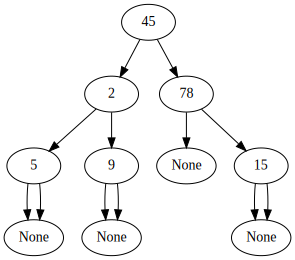

In [ ]:
arbol5 = Tree(45, Tree(2, Tree(5), Tree(9)), Tree(78, None, Tree(15)))
arbol5.graph_tree()

In [ ]:
arbol5.nodos()

6

In [ ]:
arbol5.menor_mayor()

(2, 78)

In [ ]:
arbol5.buscar(78)

True

In [ ]:
arbol5.altura()

2

**Ejercicio 3**:

a. Pensar y dibujar un ejemplo de árbol en papel, escribir los resultados de PreOrder, InOrder y PostOrder

b. Implementar los recorridos PreOrder, InOrder y PostOrder como funciones recursivas, verificar sus resultados

c. Implementar los recorridos PreOrder, InOrder y PostOrder como funciones iterativas, verificar sus resultados

_Ayuda_: Para las versiones iterativas, necesitará utilizar una Pila como estructura de datos adicional. Puede importar una implementacion cualquiera de Pila que haya realizado en la Practica anterior.

In [ ]:
def printTreePreOrder(Tree):
        if Tree.cargo == None:
            return "Arbol vacío"
        print(Tree.cargo)
        printTreePreOrder(Tree.left)
        printTreePreOrder(Tree.right)
        # if Tree.left is not None:
        #     Tree.left.printTreePreOrder()
        # if Tree.right is not None:
        #     Tree.right.printTreePreOrder()

In [ ]:
printTreePreOrder(arbol5)

**Ejercicio 4** Escriba una funcion `copiar` que reciba un árbol y devuelva un _nuevo_ árbol idéntico al original.

##Árboles Binarios de Búsqueda

**Ejercicio 5**: Dibuje un árbol binario de búsqueda de palabras, con al menos 5 palabras, utilizando orden de diccionario (lexicográfico). Acomódelo como más le guste, mientras sea correcto. Luego indique en qué lugar del árbol se insertaría la palabra `python`.

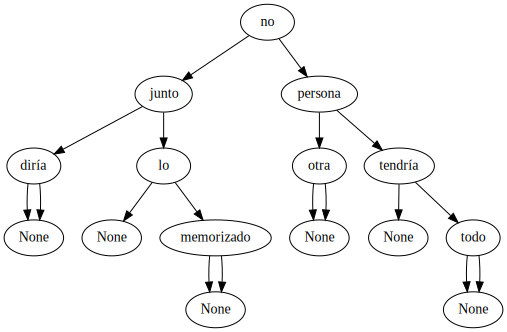

In [ ]:
# "OTRA PERSONA NO DIRIA TODO JUNTO LO TENDRIA MEMORIZADO"

miarbol6 = BSTree("no", BSTree("junto", BSTree("diría"), BSTree("lo", None, BSTree("memorizado"))), BSTree("persona", BSTree("otra"), BSTree("tendría", None, BSTree("todo"))))
miarbol6.graph_tree()

**Ejercicio 6**: Utilizando la misma clase Tree de la sección anterior, implemente otra clase llamada BSTree que herede de esta, reimplemente los métodos **menor_mayor**, **buscar** e implemente un nuevo método llamado **insertar** que inserte un elemento.

_Ayuda: puede optar por definir métodos menor y mayor **internamente** por separado para hacer la implementación más sencilla, pero no es estrictamente necesario._

In [ ]:
import graphviz
class BSTree:
    def __init__(self, cargo, left = None, right = None):
        """Inicializa un árbol binario de búsqueda vacío"""
        self.cargo = cargo
        self.left = left
        self.right = right

    def __str__(self):
        """Imprime en pantalla"""
        return str(self.cargo)

    # def insertBST(self, dato, BST_Tree):
    #     if BST_Tree == None:
    #         return BST_Tree(dato, None, None)
    #     else:
    #         if dato < BST_Tree.cargo:
    #             return


    def graph_tree(self, dot = None):
        if dot is None:
            dot = graphviz.Digraph(comment='Binary Tree')
        # Agregar el nodo actual al gráfico
        dot.node(str(self.cargo))
        # Agregar nodos para los hijos izquierdo y derecho (si existen)
        if self.left:
            dot.edge(str(self.cargo), str(self.left.cargo))
            self.left.graph_tree(dot)
        else:
            dot.node(f'None_{self.cargo}', label='None')
            dot.edge(str(self.cargo), f'None_{self.cargo}')
        if self.right:
            dot.edge(str(self.cargo), str(self.right.cargo))
            self.right.graph_tree(dot)
        else:
            dot.node(f'None_{self.cargo}', label='None')
            dot.edge(str(self.cargo), f'None_{self.cargo}')
        return dot

**Ejercicio 7**:

La [magia de IPython](https://ipython.readthedocs.io/en/stable/interactive/magics.html) es un sistema de comandos mágicos que sirven para realizar diversas tareas del sistema operativo directamente en un entorno que use a iPython, como Google Colab, IPython, Jupyter Notebooks, etc.

Uno de estos comandos magicos es `%%timeit`, el cual sirve para medir cuando tiempo tarda en ejecutarse un bloque de codigo. Este comando corre las celdas muchas veces y calcula el tiempo promedio de ejecucion, para asegurarse de que la medicion sea confiable.

En la siguientes dos celdas de código se realizan dos experimentos:

1. Por un lado, se insertan los numeros del 1 al 900 en un BSTree en orden creciente, y luego, se chequea si cada uno esta en el arbol.
2. En otra celda, se insertan los numeros del 1 al 900 en un BSTree en orden aleatorio, y luego, se chequea si cada uno esta en el arbo.

Corra los experimentos utilizando Google Colab o IPython y explique porque uno de los dos tarda menos que el otro.



In [ ]:
%%timeit
# Insertamos los numeros del 1 al 100000 en un BSTree en orden creciente
t = BSTree(1)
for i in range(900):
  t.insert(i)

# Y luego chequeamos si cada numero fue insertado
for i in range(900):
  t.buscar(i)

321 ms ± 109 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
# Insertamos los numeros del 1 al 100000 en un BSTree en orden aleatorio
import random
t = BSTree(1)
L = list(range(900))
random.shuffle(L)
for i in L:
  t.insert(i)

# Y luego chequeamos si cada numero fue insertado
for i in range(900):
  t.buscar(i)

6.64 ms ± 650 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Ejercicio 8**: Escriba una funcion `combinar` que combine dos arboles binarios de búsqueda en uno solo. El resultado tambien debe ser un arbol binario de busqueda.

_Ayuda: quizás resulte conveniente implementar una función de copia pero para BSTree_

**Ejercicio 9** Escriba una función `borrar_raiz`. Dado un arbol binario de busqueda, esta funcion deberia devolver un nuevo arbol binario de busqueda que contenga los mismos datos, a excepcion de la raiz.

**Ejercicio 10** Escriba una funcion `borrar_valor` que dado un arbol binario de busqueda y un valor, devuelva un arbol binario de busqueda sin ese valor.

# Ejercicios Adicionales

**Ejercicio 11**: En la unidad anterior mencionamos cómo utilizamos notación postfija de expresiones para evaluar en un Stack y sin usar paréntesis. Con árboles podemos representar expresiones infijas sin paréntesis. Cada nodo interno del árbol representa un operador, izquierda y derecha son subexpresiones, y las hojas son números. Implementar una clase Expression que herede de Tree, un árbol de expresiones infijas, con dos métodos.

* **imprimir**: que imprime la expresión de forma infija con paréntesis.
* **evaluar**: evalúa todo el árbol y lo reduce a un número.

Ejemplo
```
     *
   /   \
  +     -     ==>   ((1 + 2) * (3 - 4))   ==>   -2
 / \   / \
1   2 3   4
```

**Ejercicio 12** ¿Se podrían representar los árboles (pensados como TAD) utilizando una estructura de datos contigua? ¿Porque?